In [28]:
import cv2
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils

In [29]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

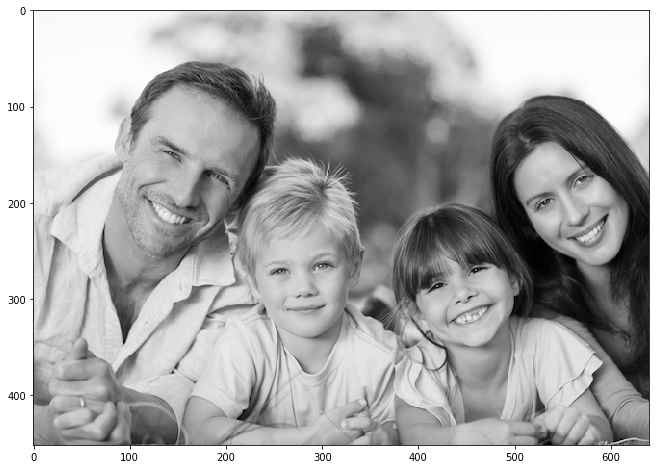

In [38]:
image = cv2.imread('images/img2.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20,8))
plt.imshow(gray_image, cmap='gray')
plt.show()

In [31]:
fd, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=False)

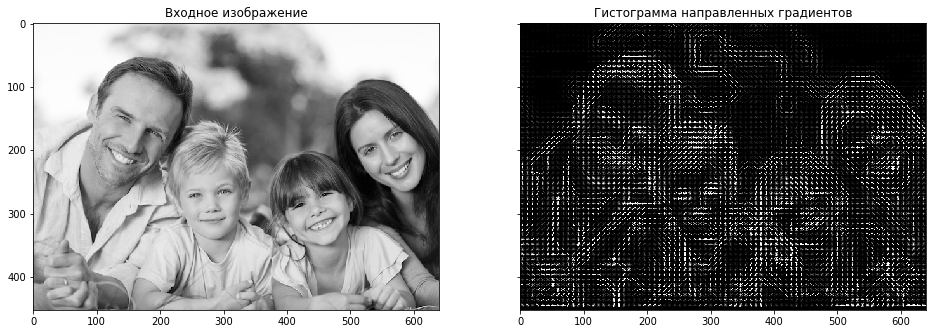

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(gray_image, cmap=plt.cm.gray) 
ax1.set_title('Входное изображение') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Гистограмма направленных градиентов')

plt.show()

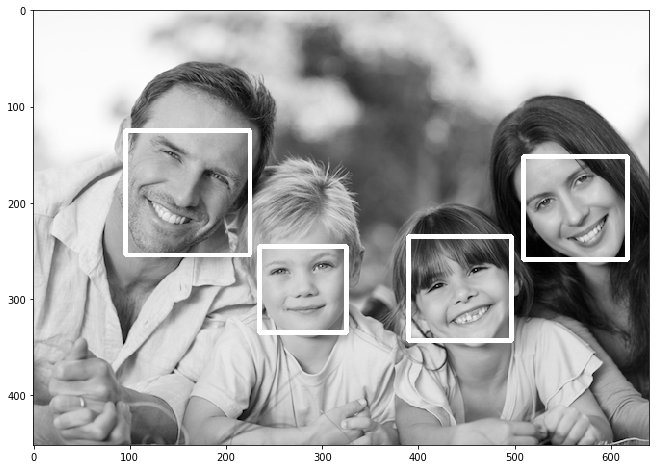

In [39]:
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(gray_image, 1)
for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(gray_image, (x, y), (x + w, y + h), (255, 255, 255), 3)
    
plt.figure(figsize=(12,8))
plt.imshow(gray_image, cmap='gray')
plt.show()